# Machine Learning Algorithm Performance Metrics

><small><i>from the book 
"Machine Learning Mastery With Python: Understand Your Data, Create Accurate Models and Work Projects End-To-End"
by Jason Brownlee, Migrated to Jupyter with additions by Mitch Sanders 2017</i></small>




The metrics that you choose to evaluate your machine learning algorithms are very important.
Choice of metrics influences how the performance of machine learning algorithms is measured
and compared. They influence how you weight the importance of different characteristics in
the results and your ultimate choice of which algorithm to choose. In this chapter you will
discover how to select and use different machine learning performance metrics in Python with
scikit-learn. Let’s get started.

## Algorithm Evaluation Metrics
In this lesson, various algorithm evaluation metrics are demonstrated for both classification and
regression type machine learning problems. In each recipe, the dataset is downloaded directly
from the UCI Machine Learning repository.
- For **classification** metrics, the Pima Indians onset of diabetes dataset is used as demonstration. This is a binary classification problem where all of the input variables are numeric.
- For **regression** metrics, the Boston House Price dataset is used as demonstration. this is a regression problem where all of the input variables are also numeric.

All recipes evaluate the same algorithms, Logistic Regression for classification and Linear
Regression for the regression problems. A 10-fold cross-validation test harness is used to
demonstrate each metric, because this is the most likely scenario you will use when employing
different algorithm evaluation metrics.

A caveat in these recipes is the cross validation.cross val score function used to
report the performance in each recipe. It does allow the use of different scoring metrics
that will be discussed, but all scores are reported so that they can be sorted in ascending
order (**largest score is best**). Some evaluation metrics (like mean squared error) are naturally
descending scores (*the smallest score is best*) and as such are reported as negative by the cross validation.cross val score() function. <u>This is important to note</u>, because some
scores will be reported as negative that by definition can never be negative. I will remind you
about this caveat as we work through the lesson.

You can learn more about machine learning algorithm performance metrics supported by
scikit-learn on the page *Model evaluation: quantifying the quality of predictions*. 

http://scikit-learn.org/stable/modules/model_evaluation.html

http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html

Let’s get on with the evaluation metrics.


## Classification Metrics
Classification problems are perhaps the most common type of machine learning problem and as
such there are a myriad of metrics that can be used to evaluate predictions for these problems.
In this section we will review how to use the following metrics:
- Classification Accuracy.
- Logarithmic Loss.
- Area Under ROC Curve.
- Confusion Matrix.
- Classification Report.

### Classification Accuracy
Classification accuracy is the number of correct predictions made as a ratio of all predictions
made. This is the most common evaluation metric for classification problems, **it is also the most
misused**. It is really only suitable when there are an equal number of observations in each class
(which is rarely the case) and that **all predictions and prediction errors are equally important**,
which is often not the case. Below is an example of calculating classification accuracy.


In [9]:
# Cross Validation Classification Accuracy
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = '../pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
#("Accuarcy: {:4.3f}%".format(result*100))
print("Accuracy: {:0.2f}% ".format(results.mean()*100) + "{:0.3f}".format(results.std()))


Accuracy: 76.95% 0.048


You can see that the ratio is reported. This can be converted into a percentage by multiplying
the value by 100, giving an accuracy score of approximately 77% accurate.

### Logarithmic Loss
Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities
of membership to a given class. The scalar probability between 0 and 1 can be seen as a measure
of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are
rewarded or punished proportionally to the confidence of the prediction. Below is an example
of calculating logloss for Logistic regression predictions on the Pima Indians onset of diabetes
dataset.

In [11]:
# Cross Validation Classification LogLoss
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = '../pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# print("Accuracy: {:0.2f}% ".format(results.mean()*100) + "{:0.3f}".format(results.std()))
print("Logloss mean: {:0.3f}".format(results.mean()) + " and Logloss std: {:0.3f}".format(results.std()))


Logloss mean: -0.492 and Logloss std: 0.047


Smaller logloss is better with 0 representing a perfect logloss. As mentioned above, the
measure is inverted to be ascending when using the cross val score() function.


### Area Under ROC Curve
Area under ROC Curve (or AUC for short) is a performance metric for binary classification
problems. The AUC represents a model’s ability to discriminate between positive and negative
classes. An area of 1.0 represents a model that made all predictions perfectly. An area of
0.5 represents a model that is as good as random. ROC can be broken down into sensitivity
and specificity. A binary classification problem is really a trade-off between sensitivity and
specificity.

- **Sensitivity** is the true positive rate also called the recall. It is the number of instances from the positive (first) class that actually predicted correctly.
- **Specificity** is also called the true negative rate. Is the number of instances from the negative (second) class that were actually predicted correctly.

The example below provides a demonstration of calculating AUC.

Note* Sensitivity = Recall (synonyms)


In [13]:
# Cross Validation Classification ROC AUC
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = '../pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# print("Accuracy: {:0.2f}% ".format(results.mean()*100) + "{:0.3f}".format(results.std()))
print("AUC mean: {:0.3}".format(results.mean()) + " AUC std: {:0.3}".format(results.std()))


AUC mean: 0.824 AUC std: 0.0409


You can see the AUC is relatively close to 1 and greater than 0.5, suggesting some skill in
the predictions.

### Confusion Matrix
The confusion matrix is a handy presentation of the accuracy of a model with two or more
classes. The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The
cells of the table are the number of predictions made by a machine learning algorithm. For
example, a machine learning algorithm can predict 0 or 1 and each prediction may actually have
been a 0 or 1. Predictions for 0 that were actually 0 appear in the cell for prediction = 0 and
actual = 0, whereas predictions for 0 that were actually 1 appear in the cell for prediction = 0
and actual = 1. And so on. Below is an example of calculating a confusion matrix for a set of
predictions by a Logistic Regression on the Pima Indians onset of diabetes dataset.


<img src='images/confusionMatrix.png'></img>

In [14]:
# Cross Validation Classification Confusion Matrix
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
filename = '../pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

test_size = 0.33
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

matrix = confusion_matrix(Y_test, predicted)
print(matrix)


[[141  21]
 [ 41  51]]


### Classification Report
The scikit-learn library provides a convenience report when working on classification problems
to give you a quick idea of the accuracy of a model using a number of measures. The
classification report() function displays the precision, recall, F1-score and support for each
class. The example below demonstrates the report on the binary classification problem.


In [16]:
# Cross Validation Classification Report
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
filename = '../pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)


             precision    recall  f1-score   support

        0.0       0.77      0.87      0.82       162
        1.0       0.71      0.55      0.62        92

avg / total       0.75      0.76      0.75       254



You can see good prediction and recall for the algorithm.


## Regression Metrics
In this section will review 3 of the most common metrics for evaluating predictions on regression
machine learning problems:
- Mean Absolute Error.
- Mean Squared Error.
- R2.

### Mean Absolute Error
The Mean Absolute Error (or MAE) is the sum of the absolute differences between predictions
and actual values. It gives an idea of how wrong the predictions were. The measure gives an
idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting).
The example below demonstrates calculating mean absolute error on the Boston house price
dataset.


In [22]:
# Cross Validation Regression MAE
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = '../housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# print("Accuracy: {:0.2f}% ".format(results.mean()*100) + "{:0.3f}".format(results.std()))
print("MAE mean: {:0.3f}".format(results.mean()) + ", MAE std: {:0.3f}".format(results.std()))



MAE mean: -4.005, MAE std: 2.084


A value of 0 indicates no error or perfect predictions. Like logloss, this metric is inverted by
the cross val score() function.


### Mean Squared Error
The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a
gross idea of the magnitude of error. Taking the square root of the mean squared error converts
the units back to the original units of the output variable and can be meaningful for description
and presentation. This is called the Root Mean Squared Error (or RMSE). The example below
provides a demonstration of calculating mean squared error.


In [30]:
# Cross Validation Regression MSE
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = '../housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# print("Accuracy: {:0.2f}% ".format(results.mean()*100) + "{:0.3f}".format(results.std()))
print("MSE mean: {:0.3f}".format(results.mean()) + ", MSE std: {:0.3f}". format(results.std()))


MSE mean: -34.705, MSE std: 45.574


This metric too is inverted so that the results are increasing. Remember to take the absolute
value before taking the square root if you are interested in calculating the RMSE.

### R2 Metric
The R2 (or R Squared) metric provides an indication of the goodness of fit of a set of predictions
to the actual values. In statistical literature this measure is called the coefficient of determination.

This is a value between 0 and 1 for no-fit and perfect fit respectively. The example below
provides a demonstration of calculating the mean R2
for a set of predictions.


In [32]:
# Cross Validation Regression R^2
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = '../housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# print("Accuracy: {:0.2f}% ".format(results.mean()*100) + "{:0.3f}".format(results.std()))
print("R Squared Mean: {:0.3f}".format(results.mean()) + ", R Squared STD: {:0.3f}".format(results.std()))


TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

You can see the predictions have a poor fit to the actual values with a value closer to zero
and less than 0.5.


## Summary
In this chapter you discovered metrics that you can use to evaluate your machine learning
algorithms.
You learned about three classification metrics: Accuracy, Logarithmic Loss and Area Under
ROC Curve. You also learned about two convenience methods for classification prediction
results: the Confusion Matrix and the Classification Report. Finally, you also learned about
three metrics for regression problems: Mean Absolute Error, Mean Squared Error and R2.

### Next
You now know how to evaluate the performance of machine learning algorithms using a variety
of different metrics and how to use those metrics to estimate the performance of algorithms on
new unseen data using resampling. In the next lesson you will start looking at machine learning
algorithms themselves, starting with classification techniques.


<hr>

## Appendix

### About the Boston House Price dataset:
Maintained at UCI machine Learning Repository
https://archive.ics.uci.edu/ml/datasets/housing

Included in scikit-learn datasets module
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html


#### Attribute Information:

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per 10,000 US Dollars
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in 1000's US Dollars


In [ ]:
# demo using Boston Housing data in SciKit-learn
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

### About the Pima Indian Dataset 

#### Attribute Information:

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

#### Additional notes on a Confusion Matrix


- Q: What is the best way to understand the terms "precision" and "recall"?
- A:  
    - Recall:  correctly predicted 1's / all 1's = TP / (TP + FN); 
    - Precision: correctly  predicted 1's / all predicted 1's = TP / (TP+FP)

Reference links: 

- https://www.quora.com/What-is-the-best-way-to-understand-the-terms-precision-and-recall
- https://classeval.wordpress.com/introduction/basic-evaluation-measures/
- http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
 
You can learn most all you need to learn it from this link.


In [26]:
def show_confusion_matrix(C,class_labels=['0','1']):
    """
    # http://notmatthancock.github.io/2015/10/28/confusion-matrix.html
    # source has ERRORS in definitions - corrected here by Mitch Sanders 6/28/2017
    
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'True Neg Rate: %.2f %%\n[Specificity]\n(TN / (TN + FP))' % (tn / (fp+tn+0.)*100),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f %%\n[Recall, Sensitivity]\nTP / (TP + FN)'%(tp / (tp+fn+0.)*100),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f %%'%((tp+tn+0.)/N*100),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pred Val: %.2f %%\nTN / (TN + FN)'%(tn/(fn+tn+0.)*100),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f %%\n[Precision]\nTP / (TP + FP)'%(tp/(tp+fp+0.)*100),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()
    plt.show()

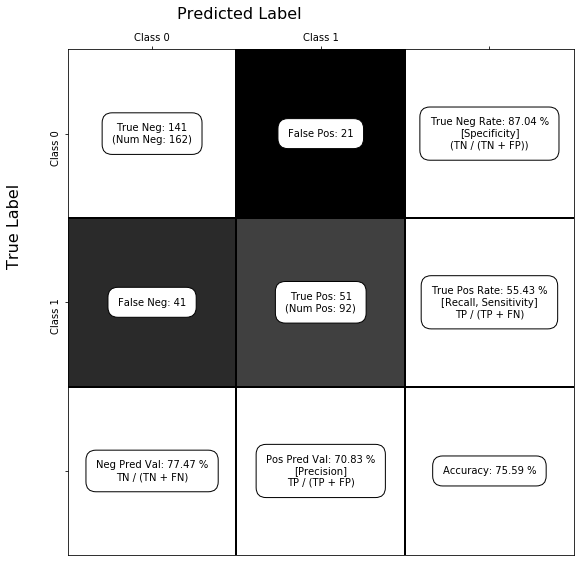

In [27]:
# a little nicer visualization from 
# http://notmatthancock.github.io/2015/10/28/confusion-matrix.html
# function is below.... run first before calling here 
C = confusion_matrix(Y_test, predicted)
show_confusion_matrix(C, ['Class 0', 'Class 1'])

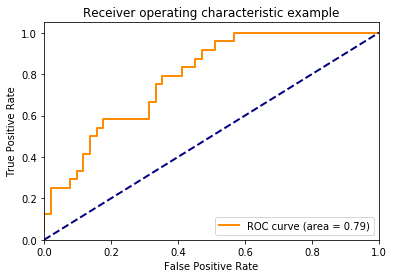

In [25]:
# demo on AUC visualization on Iris dataset

# print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()